In [5]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
#     dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    dog_targets = data['target']
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('data/dogImages/train')
valid_files, valid_targets = load_dataset('data/dogImages/valid')
test_files, test_targets = load_dataset('data/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("data/dogImages/train/*/"))]
for i in range(len(dog_names)):
    dog_names[i] = dog_names[i].split('.')[1]
print(dog_names)
# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

['American_eskimo_dog', 'Australian_shepherd', 'Briard', 'Dalmatian', 'German_shepherd_dog', 'Havanese', 'Italian_greyhound']
There are 7 total dog categories.
There are 560 total dog images.

There are 447 training dog images.
There are 55 validation dog images.
There are 58 test dog images.


In [7]:

from keras.preprocessing import image                  
import cv2
from PIL import Image, ImageOps, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import pandas as pd
import matplotlib.pyplot as plt
from time import time 

    


In [66]:
def py_resize(image):
    
    desired_size = 128
    im_pth = image
    im = Image.open(im_pth)
    
    old_size = im.size  # old_size[0] is in (width, height) format
    
    ratio = float(desired_size)/max(old_size)
    
    new_size = tuple([int(x*ratio) for x in old_size])
    
    # use thumbnail() or resize() method to resize the input image
    # thumbnail is a in-place operation
    im.thumbnail(new_size, Image.ANTIALIAS)
#     im = im.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it
    new_im = Image.new("L", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))


    # display(new_im)
    new_im = np.array(new_im)
    new_im = cv2.resize(new_im, None, fx = .5, fy = .5, interpolation = cv2.INTER_LINEAR)
    return new_im

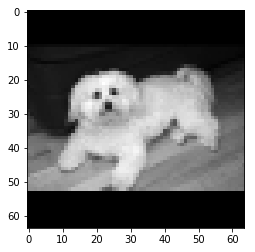

In [67]:
k = py_resize(train_files[0])
plt.imshow(k, cmap = 'gray')
plt.show()

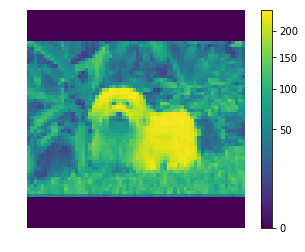

In [68]:
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.visualization import MinMaxInterval

img = py_resize(train_files[188])
norm = ImageNormalize(img, interval=MinMaxInterval(), stretch=SqrtStretch())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(img, origin='upper', norm=norm)
fig.colorbar(im)
plt.axis('off')
plt.show()

In [69]:
train_images = []
for i in range(len(train_files)):
    k = py_resize(train_files[i]).astype('float32')/255
    train_images.append(k)
    
train_images = np.array(train_images)
train_images.shape

(447, 64, 64)

In [70]:
test_images = []
for i in range(len(test_files)):
    k = py_resize(test_files[i]).astype('float32')/255
    test_images.append(k)

test_images = np.array(test_images)
test_images.shape

(58, 64, 64)

In [71]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2


def Hog(image1):
    
    image = image1

    out, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, 
                         block_norm = 'L1', feature_vector = True, transform_sqrt = True)
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
#     ax1.axis('off')
#     ax1.imshow(image, cmap=plt.cm.gray)
#     ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10), out_range=(0, 255))
    hog_image = hog_image.astype("uint8")

#     ax2.axis('off')
#     ax2.imshow(hog_image, cmap=plt.cm.gray)
#     ax2.set_title('Histogram of Oriented Gradients')
#     plt.show()
    return out



In [72]:
# make = imagePath.split("/")[-2]

import imutils
from skimage.feature import hog
from skimage import data, exposure

def Hog_edge(img1):

    # load the image, convert it to grayscay
    
    original = py_resize(img1)
    edged = imutils.auto_canny(original)

    #  extract Histogram of Oriented Gradients from the logo
    H, img = hog(edged, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), transform_sqrt=True, 
                 feature_vector = True, visualize = True, block_norm="L1")

    img = exposure.rescale_intensity(img, out_range = (0, 255))

#     fig = plt.figure(figsize=(15, 15))
#     images = ("Original grayscaled", original), ("Edge Filters", edged), ("Hog Features", img)

#     # loop over the images
#     for (i, (name, image)) in enumerate(images):
#         # show the image
#         ax = fig.add_subplot(1, 3, i + 1)
#         ax.set_title(name)
#         plt.imshow(image, cmap = 'gray')
#         plt.axis("off")
 
    # show the figure
#     plt.show()
    
    return H

p = Hog_edge(train_files[298])
 
p.shape 


(1764,)

In [73]:
k = Hog(train_images[298])

# plt.imshow(image, cmap = 'gray')
# plt.show()
train_images[100].shape

(64, 64)

In [58]:
hog_edge_train = []

for i in range(len(train_files)):
    hog_edge_train.append(Hog_edge(train_files[i]))
    
hog_edge_train = np.array(hog_edge_train)

In [60]:
hog_edge_test = []

for i in range(len(test_files)):
    hog_edge_test.append(Hog_edge(test_files[i]))
    
hog_edge_test = np.array(hog_edge_test)
hog_edge_test.shape

(58, 8100)

In [74]:
hog_features = []

for i in range(len(train_images)):
    hog_features.append(Hog(train_images[i]))
    
hog_train = np.array(hog_features)  


In [75]:
hog_test = []

for i in range(len(test_images)):
    hog_test.append(Hog(test_images[i]))
    
hog_test = np.array(hog_test)
hog_test.shape

(58, 1764)

In [76]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

In [96]:
n_components = 100
# print(X_train.shape)
print("Extracting the top %d eigenfaces from %d faces" % (n_components, hog_train.shape[0]))

t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized').fit(hog_train)
# pca = PCA(n_components=n_components, svd_solver='randomized').fit(hog_edge_train)


print("done in %0.3fs" % (time() - t0))

# eigenfaces = pca.components_.reshape((n_components, 224, 224))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(hog_train)
X_test_pca = pca.transform(hog_test)
# X_train_pca = pca.transform(hog_edge_train)
# X_test_pca = pca.transform(hog_edge_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 100 eigenfaces from 447 faces
done in 0.522s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.047s


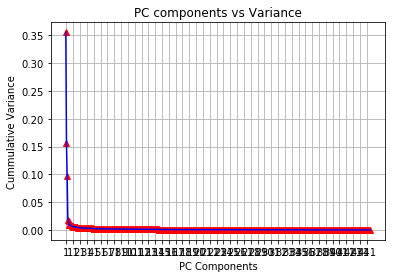

In [83]:
# printmd("#### Finding best 'k' PC components based on variance")
from sklearn.decomposition import PCA

pca = PCA( )
pca_hog_features = pca.fit_transform(hog_train)

x = np.arange(0, hog_train.shape[0])
y = pca.explained_variance_ratio_


plt.figure()
plt.plot(x, y,'r^')
plt.plot(x, y, color = 'b')
plt.title('PC components vs Variance')
plt.xlabel('PC Components')
plt.ylabel('Cummulative Variance')
plt.xticks(np.arange(1, hog_train.shape[0], step = 10.0))

plt.grid(True)
plt.show()

In [97]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV(LinearSVC(random_state=0),
                       param_grid={'C': [0.01, 0.02, 0.03, 0.1]},
                       cv=5)

clf_best = LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

# clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
#                    param_grid, cv=5)

clf = clf.fit(X_train_pca, train_targets)
# clf = clf.fit(hog_train, train_targets)

# clf_best = clf_best.fit(X_train_pca, train_targets)
# clf_best = clf_best.fit(hog_edge_train, train_targets)

print("done in %0.3fs" % (time() - t0))
# print("Best estimator found by grid search:")
# print(clf.best_estimator_)

Fitting the classifier to the training set
done in 0.930s


In [94]:
# Quantitative evaluation of the model quality on the test set
# n = 1000
print("Predicting dog's breeds on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
# y_pred = clf.predict(hog_test)

print("done in %0.3fs" % (time() - t0))

print(classification_report(test_targets, y_pred, target_names=dog_names))
# print(confusion_matrix(test_targets, y_pred, labels=range(7)))
print("Accuracy Score:",np.round(accuracy_score(test_targets, y_pred)*100, 2))

Predicting dog's breeds on the test set
done in 0.000s
                     precision    recall  f1-score   support

American_eskimo_dog       0.38      0.38      0.38         8
Australian_shepherd       0.25      0.22      0.24         9
             Briard       0.27      0.38      0.32         8
          Dalmatian       0.30      0.33      0.32         9
German_shepherd_dog       0.44      0.50      0.47         8
           Havanese       0.20      0.12      0.15         8
  Italian_greyhound       0.29      0.25      0.27         8

        avg / total       0.30      0.31      0.30        58

Accuracy Score: 31.03
